In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report

In [ ]:
#IMPORTING DATASET

In [3]:
df = pd.read_csv("C:\\Users\\Rocky\\mobile_Price\\mobile_Price_Data.csv")
print(df.keys())
df.head(10)

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


In [8]:
x = df.drop("price_range",axis = 1)
y = df["price_range"]
y = [0 if i >= 2 else 1 for i in y]
y =np.array(y)
print(x.shape)
print(y.shape)

(2000, 20)
(2000,)


In [ ]:
# PLOTTING THE DATA

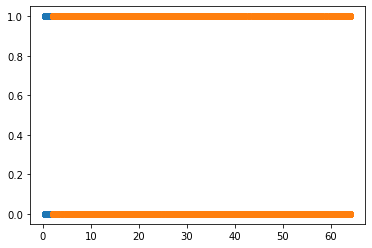

In [27]:
plt.scatter(x['clock_speed'],y,cmap = 'cool')
plt.scatter(x['int_memory'],y,cmap = 'cool')
plt.show()

In [ ]:
# TRAINING THE DATASET

In [28]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state=1,test_size=0.20)

print(xtrain.shape)
print(ytrain.shape)

print(xtest.shape)
print(ytest.shape)

(1600, 20)
(1600,)
(400, 20)
(400,)


In [ ]:
#USING LOGISTIC REGRESSION 

In [35]:
Lo_reg = LogisticRegression()


In [37]:
Lo_reg.fit(xtrain,ytrain)
ypredict1 = Lo_reg.predict(xtest)
s1 = accuracy_score(ytest,ypredict1)
r1 = classification_report(ytest,ypredict1)
print(s1)
print(r1)

0.9025
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       212
           1       0.91      0.88      0.89       188

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.90      0.90       400



E:\Software\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# USING K-MEANS CLUSTERING CLASSIFIER

In [44]:
km = KMeans(n_clusters = 2)

In [45]:
km.fit(xtrain,ytrain)
ypredict2 = km.predict(xtest)
s2 = accuracy_score(ytest,ypredict2)
r2 = classification_report(ytest,ypredict2)
print(s2)
print(r2)

0.905
              precision    recall  f1-score   support

           0       0.91      0.92      0.91       212
           1       0.90      0.89      0.90       188

    accuracy                           0.91       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.91      0.90       400



In [ ]:
# USING RANDOM FOREST CLASSIFIER

In [46]:
random = RandomForestClassifier()

In [47]:
random.fit(xtrain,ytrain)
ypredict3 = random.predict(xtest)
s3 = accuracy_score(ytest,ypredict3)
r3 = classification_report(ytest,ypredict3)
print(s3)
print(r3)

0.9475
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       212
           1       0.93      0.96      0.95       188

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



In [ ]:
# USING XGBOOST CLASSIFIER

In [53]:
xgb = XGBClassifier(verbosity = 0)

In [54]:
xgb.fit(xtrain,ytrain)
ypredict4 = xgb.predict(xtest)
#s4 = accuracy_score(ytest,ypredict4)
r4 = classification_report(ytest,ypredict4)
#print(s4)
print(r4)

E:\Software\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


              precision    recall  f1-score   support

           0       0.98      0.95      0.96       212
           1       0.95      0.97      0.96       188

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400

